In [1]:
import pandas as pd
import numpy as np
import re
import jieba
import matplotlib.pyplot as plt
# load data 
train_data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\Dataset_Total.xlsx',index_col=None, header=0)
train_data



,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3
...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1


In [2]:
# 统计每一列中元素出现的个数
count = train_data.loc[:, 'TOPIC'].value_counts()
count
print(count)

绿色食品与饥饿            989
记对我影响最大的一个人        645
一封求职信              351
由“三个和尚没水喝”想到的……    338
如何看待“安乐死”          295
如何面对挫折             196
我的一个假期             128
记我的父亲              123
学习汉语的苦与乐           120
如何解决“代沟”问题         106
我的童年                82
关于用自然之声取代噪声的建议      66
我学汉语是为了…            53
我最喜欢读的一本书           49
我的城市\/乡村生活          46
我学汉语是为了……           43
我对离婚问题的看法           16
如何看待"妻子回家"          11
我选择朋友的标准             8
我第一次……               3
Name: TOPIC, dtype: int64


<AxesSubplot:>

d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\lib\site-package

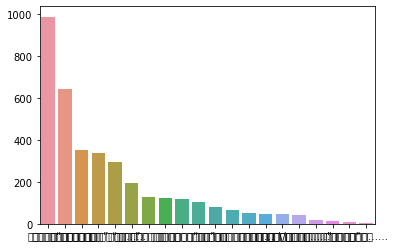

In [3]:
import seaborn as sns

sns.barplot(y=train_data['TOPIC'].value_counts().values, x=train_data['TOPIC'].value_counts().index)
#这是因为 value_counts 函数返回的是一个 Series 结果，而 pandas 直接画图之前，无法自动地对索引先进行排序，而 seaborn 则可以。
#  如果想坚持使用pandas（背后是matplotlib）画图，那么可以先将这个 Series 转换为 DataFrame，并对索引列进行重命名、排序，然后再画图。

from matplotlib.pyplot import MultipleLocator
y_list = train_data['content_length'].values.tolist()
x_list =np.array(y_list)
x_list = np.array(list(range(3668)))
x_list
plt.figure(figsize=(20, 10))
x_major_locator=MultipleLocator(400)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(100)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数

plt.xlabel('Number of Essays',fontsize=14)
plt.ylabel('Number of words in each essay',fontsize=14)
plt.title("Each essay's total word count",fontsize=24)
plt.scatter(x_list, y_list)
plt.show()

In [4]:
#  Word cut
train_data['WORDCUT'] = train_data['CONTENT_NEW']
def cut_word(CONTENT_NEW):
    cw = jieba.cut(CONTENT_NEW)
    return ' '.join(cw)
train_data['WORDCUT'] = train_data['WORDCUT'].apply(cut_word)
train_data.head()





Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dawns\AppData\Local\Temp\jieba.cache
Loading model cost 1.022 seconds.
Prefix dict has been built successfully.


,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3


In [5]:
# count the number of words in whole text
#train_data['WORDCUT']  
words = train_data['WORDCUT'].values.tolist()
#words
words_str = re.sub('\W*', '',''.join(words))
#words_str
wordslist = list(jieba.cut(words_str))
#wordslist
print('Total number of words:',len(wordslist))

Total number of words: 763438


In [6]:
# load connective corpus
data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\connectives corpus simplify.xlsx',index_col=None,header=0)
list1 = data.values.tolist()
a = np.array(list1)
#list1   
# flatten,remove nan and punction
list2 = a.flatten()
list2 = list2.tolist()
while 'nan' in list2:
    list2.remove('nan')
# list2
#list3 = re.sub('\W*', '',''.join(list2))   #Finally find that do not need to resub punctuation.
#list3
#list4=list(jieba.cut(list3,use_paddle=True))
#will not use jieba.cut for connectives_corpus since that will cause mistake in those two words"反之”“所以”.
connective_list=list2
#connective_list
print('Number of connective words dictionary:',len(connective_list))     





Number of connective words dictionary: 221


In [7]:
# Sum of connective words in train_data，the most frequency words and the least words
from collections import Counter
Sum_Words = [s for s in wordslist if s in connective_list ]
#Sum_Words
print('Total number of connective words:',len(Sum_Words))
word_counts = Counter(Sum_Words)
#word_counts = sorted(word_counts.items(), key=lambda d:d[1], reverse = True) # sort interable objects
top_twelf = word_counts.most_common(12)
print('The most frequency connective words:',top_twelf)
least_twelf = word_counts.most_common()[:-13:-1]
print('The least frequency connective words:',least_twelf)





Total number of connective words: 58941
The most frequency connective words: [('和', 5158), ('就', 3503), ('所以', 3139), ('而', 2714), ('因为', 2424), ('但', 2408), ('但是', 2033), ('如果', 1989), ('与', 1959), ('为了', 1734), ('就是', 1540), ('跟', 1530)]
The least frequency connective words: [('省得', 1), ('然则', 1), ('诚然', 1), ('紧接着', 1), ('抑', 1), ('唯独', 1), ('总归', 1), ('而况', 1), ('宁', 1), ('不料', 1), ('换言之', 1), ('宁肯', 1)]


In [8]:
#data


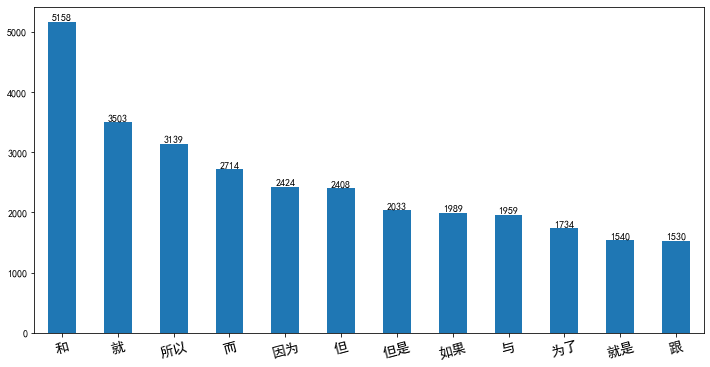

In [8]:
# visualise the most amount of connective words in whole essays
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x_labels = [val[0] for val in top_twelf]
y_labels = [val[1] for val in top_twelf]
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels) 
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=15) 
    plt.tick_params(axis='x', labelsize=14) 

In [9]:
#counter the useage situation in sub-type of connective words
cons = ['Coordinating','Continuing','Inflection','Causal','Choose','Hypothesized','Comparative','Concession','Progressive','Conditions','Purpose','Others']
Sum_sub = []
for con in cons:
    list_con = data[con].values.tolist()
    list_con = [str(x) for x in list_con]
    while 'nan' in list_con:
        list_con.remove('nan')
    subconnectives = [p for p in wordslist if p in list_con ]
    sub_conuts = Counter(subconnectives)
    top_sub5 =  sub_conuts.most_common(5)
    least_sub5 =  sub_conuts.most_common()[:-6:-1]
    print(con)
    print(len(subconnectives))
    print(top_sub5)
    print(least_sub5)
    Sum_sub.append(len(subconnectives))
    #print(subconnectives)
print(Sum_sub)

Coordinating
12964
[('和', 5158), ('与', 1959), ('跟', 1530), ('又', 1165), ('还有', 944)]
[('或者说', 2), ('时而', 4), ('一会', 8), ('且', 43), ('同', 56)]
Continuing
9129
[('就', 3503), ('而', 2714), ('首先', 455), ('然后', 404), ('便', 364)]
[('紧接着', 1), ('换言之', 1), ('遂', 2), ('比方', 2), ('继而', 2)]
Inflection
9672
[('但', 2408), ('但是', 2033), ('可是', 1406), ('虽然', 1247), ('并', 729)]
[('诚然', 1), ('唯独', 1), ('不料', 1), ('恰恰相反', 2), ('反倒', 4)]
Causal
10828
[('所以', 3139), ('因为', 2424), ('才', 858), ('因此', 757), ('以', 529)]
[('然则', 1), ('看样子', 2), ('以至于', 4), ('幸而', 4), ('只得', 5)]
Choose
3207
[('不是', 1243), ('还是', 942), ('或', 795), ('便是', 45), ('或是', 45)]
[('抑', 1), ('宁', 1), ('宁肯', 1), ('抑或', 2), ('乃是', 11)]
Hypothesized
2714
[('如果', 1989), ('如', 222), ('要是', 159), ('若', 104), ('假如', 81)]
[('倘', 2), ('假使', 6), ('要不是', 11), ('假若', 14), ('果然', 15)]
Comparative
519
[('像', 295), ('不如', 115), ('似乎', 40), ('等于', 34), ('不及', 15)]
[('如同', 4), ('不比', 6), ('好比', 10), ('不及', 15), ('等于', 34)]
Concession
1758
[('就是', 1540), (

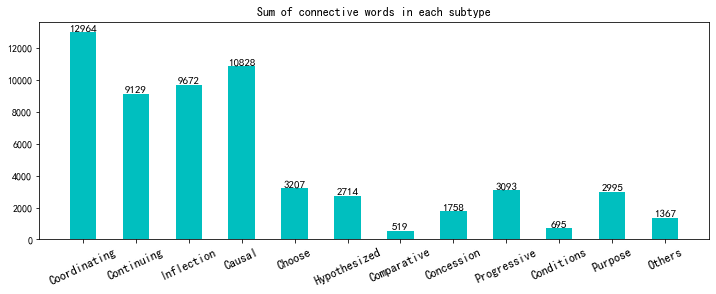

In [14]:
# draw the picture for connective words distribution
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(12,4))
plt.bar(cons,Sum_sub,width=0.5,align='center',color = 'c')
plt.title('Sum of connective words in each subtype')
plt.xticks(rotation=25) 
plt.tick_params(axis='x', labelsize=12) 
for a,b in zip(cons,Sum_sub):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()


In [12]:
# Find the amount of connectives in every words level 
Words_level = pd.read_excel(r"C:\Users\dawns\Desktop\Master thesis\data\level of connective words.xlsx",index_col=None, header=0)
#Words_level
levels = ['First','Second','Third','Fourth','Fifth','Sixth','others']

Sum_wordlevel = []
for level in levels:
    level_list1 = Words_level[level].values.tolist()
    level_list1 = [str(x) for x in level_list1]
    while 'nan' in level_list1:
        level_list1.remove('nan')
    #print(level_list1)
    level_match = [l for l in wordslist if l in level_list1 ]
    #print(level_match)
    sub_level = Counter(level_match)
    top_sub3 =  sub_level.most_common(3)
    least_sub3 =  sub_level.most_common()[:-4:-1]
    Sum_wordlevel.append(len(level_match))
    print(level,':',len(level_match),top_sub3,least_sub3)
    #print(level_match)
print(Sum_wordlevel)



First : 5158 [('和', 5158)] [('和', 5158)]
Second : 12346 [('就', 3503), ('所以', 3139), ('因为', 2424)] [('虽然', 1247), ('但是', 2033), ('因为', 2424)]
Third : 16398 [('如果', 1989), ('为了', 1734), ('就是', 1540)] [('不比', 6), ('一会', 8), ('终于', 178)]
Fourth : 12352 [('而', 2714), ('与', 1959), ('可是', 1406)] [('光', 16), ('接着', 23), ('否则', 37)]
Fifth : 1820 [('便', 364), ('以及', 174), ('反而', 162)] [('除非', 10), ('据说', 12), ('宁可', 12)]
Sixth : 385 [('此外', 50), ('只不过', 50), ('以便', 29)] [('唯独', 1), ('不料', 1), ('宁肯', 1)]
others : 8520 [('但', 2408), ('还有', 944), ('或', 795)] [('省得', 1), ('然则', 1), ('诚然', 1)]
[5158, 12346, 16398, 12352, 1820, 385, 8520]


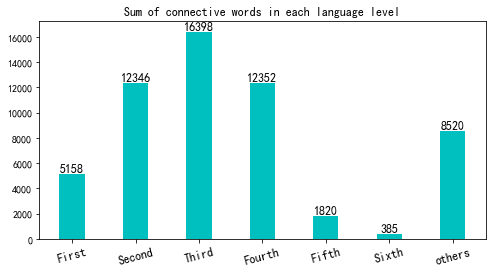

In [13]:
# Visualization of different level of connective words' distribution
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(8,4))
plt.bar(levels,Sum_wordlevel,width=0.4,align='center',color = 'c')
plt.title('Sum of connective words in each language level')
plt.xticks(rotation=15) 
plt.tick_params(axis='x', labelsize=12) 
for a,b in zip(levels,Sum_wordlevel):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
plt.show()

In [14]:
#train_data.head()

In [15]:
#Find connectvies words in every text
train_data['CONNECTIVES'] = train_data["WORDCUT"]
#connective_list
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    #print(Single_text)
    Match_result = [o for o in connective_list if o in Single_text]
    #print(Match_result,len(Match_result))





In [16]:
#Build new dataframe for every text
words_eachtext = pd.DataFrame()
words_detailed = pd.DataFrame()
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    #print(len(Single_text))
    Match_result = [o for o in connective_list if o in Single_text]
    #print(Match_result,len(Match_result))
    words_eachtext = words_eachtext.append(pd.DataFrame({len(Match_result)}),ignore_index=True)
    words_detailed = words_detailed.append(pd.DataFrame({str(Match_result)}),ignore_index=True)
#words_eachtext.head()
#words_detailed.head()
train_data['CONNECTIVES_DETAILED'] = train_data["WORDCUT"]
train_data['CONNECTIVES NUMBERS'] = train_data["WORDCUT"]
train_data['CONNECTIVES NUMBERS'] = words_eachtext 
train_data['CONNECTIVES_DETAILED'] = words_detailed

C:\Users\dawns\AppData\Local\Temp/ipykernel_7256/1160512377.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_eachtext = words_eachtext.append(pd.DataFrame({len(Match_result)}),ignore_index=True)
C:\Users\dawns\AppData\Local\Temp/ipykernel_7256/1160512377.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_detailed = words_detailed.append(pd.DataFrame({str(Match_result)}),ignore_index=True)


In [17]:
#train_data

In [18]:
Tokens = pd.DataFrame()
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    Single_text = re.sub('\W*', '',''.join(Single_text))
    Single_text = str(Single_text)
    Single_text = list(jieba.cut(Single_text))
    #print(Single_text)
    Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)
train_data['Tokens'] = Tokens 



C:\Users\dawns\AppData\Local\Temp/ipykernel_7256/3061589416.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)


In [19]:
train_data

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,CONNECTIVES,CONNECTIVES_DETAILED,CONNECTIVES NUMBERS,Tokens
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,"['便', '像', '而', '结果', '为了', '及', '如', '就', '才'...",17,342
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,"['并', '而', '及', '为', '由于', '与', '同', '先', '以',...",10,194
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,"['便', '不是', '和', '加以', '但', '还是', '虽然', '所以', ...",20,302
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,"['不是', '和', '加上', '而', '但', '或', '就是', '不然', '...",28,273
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,"['和', '而', '但', '还是', '既', '如果', '不如', '如', '无...",20,186
...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,"['和', '但', '还是', '但是', '虽然', '为', '虽', '先', '以']",9,165
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,"['和', '而', '但', '还是', '因为', '就是', '而且', '即', '...",20,122
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,"['和', '还有', '而', '但', '及', '而且', '如果', '如', '不...",19,121
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,"['跟', '并', '和', '并且', '而', '尽管', '但', '但是', '而...",21,209


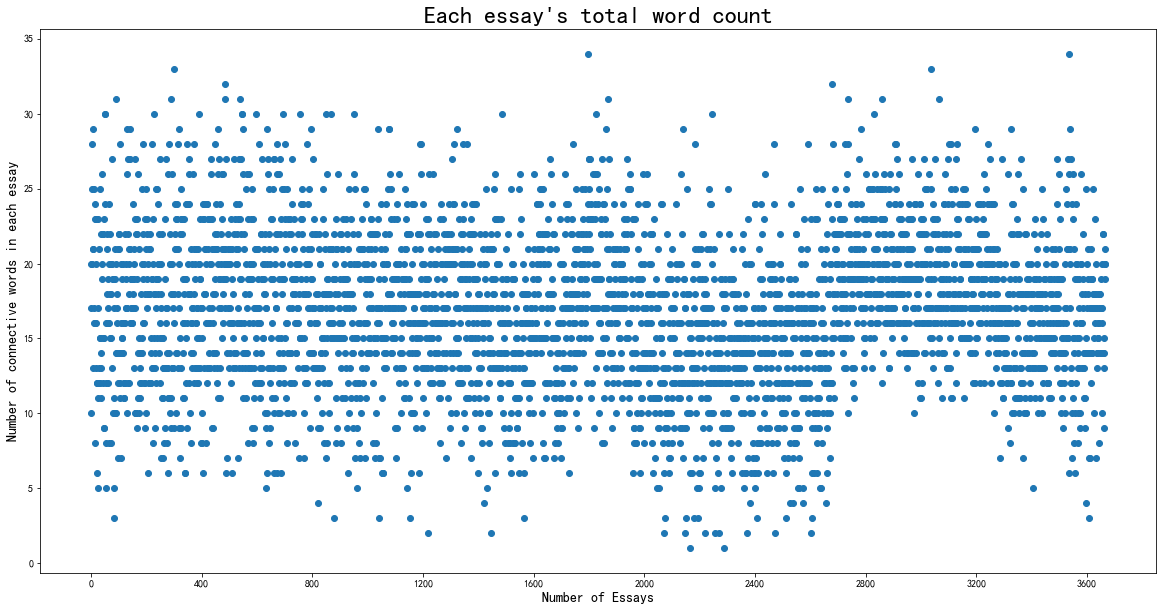

In [24]:
from matplotlib.pyplot import MultipleLocator
y_list = train_data['CONNECTIVES NUMBERS'].values.tolist()
x_list =np.array(y_list)
x_list = np.array(list(range(3668)))
x_list
plt.figure(figsize=(20, 10))
x_major_locator=MultipleLocator(400)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(5)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数

plt.xlabel('Number of Essays',fontsize=14)
plt.ylabel('Number of connective words in each essay',fontsize=14)
plt.title("Each essay's total word count",fontsize=24)
plt.scatter(x_list, y_list)
plt.show()

In [21]:
train_data.to_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Data_Total.csv')